# CPEN400D Deep Learning

Instructors: Brad Quinton, Scott Chin

# Assignment 2: Neural Networks    

In the previous assignment, we learned how to build a Logistic Regression model and found that it works well on linearly-separable data.  However, it was unable to work well on data with more complex non-linear relationships. In this assignment, we will build a shallow Neural Network in the same fashion, and explore how it can do better on nonlinearly separable data. We will also start exploring the impact of architectural decisions (number of hidden units), and the problem of overfitting.

The programming part of this assignment follows the exact same organization as Assignment 1 so you may find it useful to refer back to it.

After this assignment you will:

- Have built a complete Neural Network system that that can be used to train on data of any number of features!
- Have implemented back propagation - a key aspect of training neural networks!
- Have explored the abilities of a neural network on non-linearly-separable data
- Have explored how varying the number of hidden units impact accuracy and overfitting


## 0. Completing Your Assignment

Your assignment will be graded based on your implementation and completion of specific code cells within this Jupyter Notebook. The code cells that you need to complete will start with the following text:

**\# GRADED FUNCTION:**

Only these cells will be extracted and graded.  Furthermore, within these code cells will be comments 

**\### START CODE HERE ###** and **\### END CODE HERE ###**

Write your code **between** these comments!  Do **NOT** change any of the code outside of these comments! In these comments, we will also estimate the number of lines of code that you will need to write. We don't check line count, but if you find yourself going significantly beyond these suggestions, you may consider rethinking your approach.

Following each Graded Function code cell will be one or more test cells. You can run these test cells to check that your implementation is correct. We will use these test cells, along with some hidden tests, to grade your assignment.  

Submit your assignment via JupyterHub.  You can submit as many times as you'd like.  We will grade the most recently submitted version.

Please also edit the following code cell to include your name and student number.  Thank you!

In [1]:
# Student Name: Berkay Talha ACAR
# Student Number: 28681344

## Summary of Graded Functions

| Function                 | Marks | 
|-------------------------|-------|
| initialize_parameters() |1      |
| forward_propagation()   |2      |
| compute_cost()          |2      |
| backward_propagation()  |6      |
| train_neural_network()  |6      |
| predict()               |1      |
| TOTAL                   |18     |


## 1 Neural Networks

We will build a shallow Neural Network model with a single hidden layer.  We will make the number of hidden units in this layer parameterizable so that we can later see how increasing the number of hidden units can help with learning on more complex data.  The notiation for discussing this model are as follows.


<div>
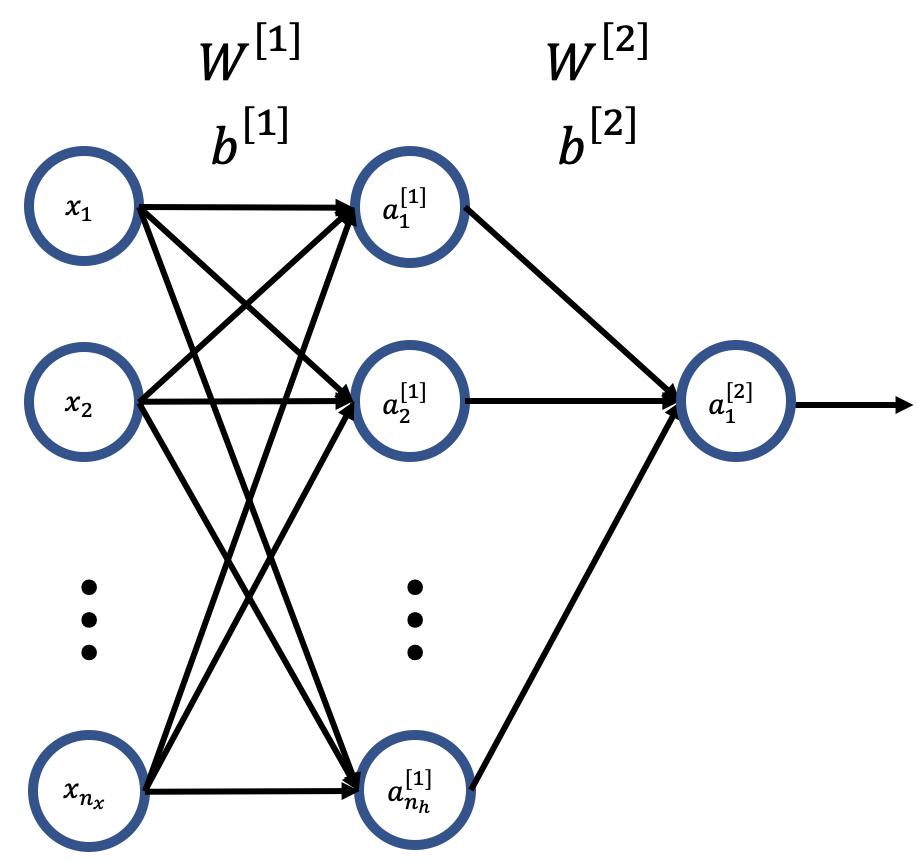
</div>


- $n_x$ Number of input features
- $n_h$ Number of hidden units in the single hidden layer
- $W^{[1]}$ parameter matrix mapping inputs to first hidden layer. Shape ($n_h$, $n_x$)
- $W^{[2]}$ parameter matrix mapping activations of first hidden layer to output layer. Shape (1, $n_h$)
- $B^{[1]}$ bias parameter matrix for first layer of hidden units. Shape ($n_h$, 1)
- $B^{[2]}$ bias parameter matrix for output layer unit. Shape (1, 1)
- $m$ number of samples in our data
- $X$ is (n_x, m)
- $Y$ is (m,)

We will follow the exact same format and order in which we built a Logistic Regression system in Assignment 1.  So you may want to refer back to it.  

First, run the following code to import NumPy and other packages.  We have provided an implementation of the Sigmoid function via the *a2_tools* package. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from a2_tools import sigmoid

%matplotlib inline


### 1.1 Initializing Parameters

Complete the following function to initialize all trainable parameters. Unlike Logistic Regression, we cannot initialize all the parameters to 0, therefore we will initialize to random numbers. Furthermore, recall that we want to initialize to random numbers close to zero. 

**Review** Why do we not want to initialize all parameters to 0? What happens if we do?

**Review** Why do we want to initialize the parameters to small numbers? 

Initialize the parameters in $W_1$ and $W_2$ to random numbers using a normal distribution with mean 0 and stddev of 0.01. Initialize the bias parameters $B_1$ and $B_2$ to zeros.  We've told you the shapes of these arrays in the code comment.

**Review** Do you understand how you would have determined the shapes of the weight matrices?

We have set the random seed to a known number for reproducibility.
 
**Hints**: 

- Use [np.random.randn()](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html). The testcase expects the use of np.random.randn().
- np.random.randn()*x will produce a normally distributed random array with a stddev of x

In [3]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h):
    """ Initialize the parameters for a 2-layer binary-classification Neural Network
    
    Inputs:
        n_x: An int for number of input features
        n_h: An int for the number of hidden units in the single hidden layer
        
    Returns:
        Four NumPy Arrays:
            W1: NumPy array of first layer of parameters with shape (n_h, n_x)
            B1: NumPy array of second layer bias parameters with shape (n_h, 1)
            W2: NumPy array of second layer of parameters with shape (1, n_h)
            B2: NumPy array of second layer bias parameters with shape (1, 1)
    """
    # Set the random seed for reproducibility
    np.random.seed(0)

    ### START CODE HERE (~ 4 lines of code) ###
    # YOUR CODE HERE
    W1 = np.random.randn(n_h, n_x)*0.01
    B1 = np.zeros((n_h, 1))
    W2 = np.random.randn(1, n_h)*0.01
    B2 = np.zeros((1, 1))
    ### END CODE HERE ###
    
    return W1, B1, W2, B2


In [4]:
def test_initialize_parameters():
    """ Testcase for initialize_parameters() """
    
    # Set up test inputs
    n_x = 2
    n_h = 4
    w1_expected = np.array([[ 0.01764052,  0.00400157],
                            [ 0.00978738,  0.02240893],
                            [ 0.01867558, -0.00977278],
                            [ 0.00950088, -0.00151357]])
    b1_expected = np.array([[0.],
                            [0.],
                            [0.],
                            [0.]])
    
    # Set up expected outputs
    w2_expected = np.array([[-0.00103219,  0.00410599,  0.00144044,  0.01454274]])
    b2_expected = np.array([[0.]])
    
    # Exercise function under test
    w1, b1, w2, b2 = initialize_parameters(n_x, n_h)
    
    # Perform test assertions
    assert isinstance(w1, np.ndarray), 'Expected a Numpy array for w1 but got {0}'.format(type(w1))
    assert w1.shape == w1_expected.shape, 'Unexpected shape for w1. Expected {0} but got {1}'.format(
        w1_expected.shape, w1.shape)
    assert np.allclose(w1, w1_expected), 'expected w1 to be {0}, but got {1}'.format(w1_expected, w1)

    assert isinstance(b1, np.ndarray), 'Expected a Numpy array for b1 but got {0}'.format(type(b1))
    assert b1.shape == b1_expected.shape, 'Unexpected shape for b1. Expected {0} but got {1}'.format(
        b1_expected.shape, b1.shape)
    assert np.allclose(b1, b1_expected), 'expected w1 to be {0}, but got {1}'.format(b1_expected, b1)

    assert isinstance(w2, np.ndarray), 'Expected a Numpy array for w2 but got {0}'.format(type(w2))
    assert w2.shape == w2_expected.shape, 'Unexpected shape for w2. Expected {0} but got {1}'.format(
        w2_expected.shape, w2.shape)
    assert np.allclose(w2, w2_expected), 'expected w2 to be {0}, but got {1}'.format(w2_expected, w2)

    assert isinstance(b2, np.ndarray), 'Expected a Numpy array for b2 but got {0}'.format(type(b2))
    assert b2.shape == b2_expected.shape, 'Unexpected shape for b2. Expected {0} but got {1}'.format(
        b2_expected.shape, b2.shape)
    assert np.allclose(b2, b2_expected), 'expected w2 to be {0}, but got {1}'.format(b2_expected, b2)



    print('PASSED: test_initialize_parameters()')

        
# Run the test
test_initialize_parameters()

PASSED: test_initialize_parameters()


## 1.2 Forward Propagation

In the case of a two-layer Neural Network, the forward propagation equations for a single sample $i$ are as follows.

Activations of first hidden layer:
$$ z^{[1](i)} = W^{[1]}x^{(i)} + B^{[1]} $$
$$ a^{[1](i)} = \tanh\left(z^{[1](i)}\right) $$

Activations of output layer:
$$ z^{[2](i)} = W^{[2]}a^{[1](i)} + B^{[2]} $$
$$ a^{[2](i)} = \sigma\left(z^{[2](i)}\right) $$

We use the tanh() function as the activation function of the hidden layer to help make training faster.  We continue to use Sigmoid for the output layer's activation function because we ultimately want the model to output a value between 0 and 1 whereas tanh() produces values between -1 and 1.

Complete the following function to implement vectorized forward propagation

In [5]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, W1, B1, W2, B2):
    """ Implement Forward Propragation for the two-layer Neural Network
    
    Inputs:
        X:  NumPy array of input samples of shape (n, m)
        W1: NumPy array of first layer of parameters with shape (n_h, n_x)
        B1: NumPy array of second layer bias parameters with shape (n_h, 1)
        W2: NumPy array of second layer of parameters with shape (1, n_h)
        B2: NumPy array of second layer bias parameters with shape (1, 1)
        
    Returns:
        Two NumPy arrays:
            A1: NumPy array of shape (n_h, m) with the activations of the first hidden layer
            A2: NumPy array of shape (1, m) with the activations of the output layer
    """
    ### START CODE HERE (~ 2-4 lines of code) ###
    # YOUR CODE HERE
    Z1 = np.matmul(W1,X) + B1
    A1 = np.tanh(Z1)
    Z2 = np.matmul(W2,A1) + B2
    A2 = sigmoid(Z2)
    #A2 = 1/(1 + np.exp(-Z2)) # this is the sigmoid 
    ### END CODE HERE ###
    
    return A1, A2

In [6]:
def test_forward_propagation():
    """ Testcase for forward_propagation() """
    
    # Set up test inputs
    X = np.array([[1.25,-0.28, 0.30],
                  [0.37, 0.87, 0.96]])
    W1 = np.array([[ 0.21, -0.84],
                   [-0.10, 0.26],
                   [ 0.29, -1.11 ],
                   [ 0.29,-1.14 ]])
    B1 = np.array([[-0.09], [ 0.08], [ 0.34], [ 0.38]])
    W2 = np.array([[ 1.22, -0.30, 1.86, 1.90]])
    B2 = np.array([[-0.39772327]])

    # Set up expected outputs
    A1_expected = np.array(
        [[-0.13742494, -0.70621888, -0.68229742],
         [ 0.05115531,  0.3222896,   0.29094652],
         [ 0.28379069, -0.60872922, -0.56394556],
         [ 0.31013973, -0.5999058,  -0.55625932]])
    A2_expected = np.array([[0.63097175, 0.02588024, 0.03157695]])
    
    # Exercise function under test
    A1, A2 = forward_propagation(X, W1, B1, W2, B2)

    # Perform test assertions
    assert isinstance(A1, np.ndarray), 'Expected a Numpy array for A1 but got {0}'.format(type(A1))
    assert A1.shape == A1_expected.shape, 'Unexpected shape for A1. Expected {0} but got {1}'.format(
        A1_expected.shape, A1.shape)
    assert np.allclose(A1, A1_expected), 'expected A1 to be {0}, but got {1}'.format(A1_expected, A1)

    assert isinstance(A2, np.ndarray), 'Expected a Numpy array for A2 but got {0}'.format(type(A2))
    assert A2.shape == A2_expected.shape, 'Unexpected shape for A2. Expected {0} but got {1}'.format(
        A2_expected.shape, A2.shape)
    assert np.allclose(A2, A2_expected), 'expected A2 to be {0}, but got {1}'.format(A2_expected, A2)


    print('PASSED: test_forward_propagation()')

        
# Run the test
test_forward_propagation()

PASSED: test_forward_propagation()


## 1.3 Cost Function

The cost function is as follows. Recall that $a^{[2](i)}$ is the model prediction and $y^{(i)}$ is the true label.

$$J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{[2](i)})+(1-y^{(i)})\log(1-a^{[2](i)})$$

Complete the following Python function to compute the cost.


In [7]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y):
    """ Vectorized Neural Network Cost Function
    
    Inputs:
        A2: NumPy array of shape (1, m) with the activations of the output layer
        Y: NumPy array (m,) with the known labels

    Returns:
        float for the computed cost
    """
    ### START CODE HERE (~ 2-4 lines of code) ###
    # YOUR CODE HERE
    cost = np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2))/(-A2.shape[1])#np.sum calculates the sum of elements after broadcasting
    ### END CODE HERE ###

    return cost

In [8]:
def test_compute_cost():
    """ Testcase for compute_cost() """
    
    # Set up test inputs
    A2 = np.array([[0.63, 0.03, 0.03, 0.88]])
    Y  = np.array([0, 0, 0, 1])

    # Set up expected outputs
    cost_expected = 0.295751014
    
    # Exercise function under test
    cost = compute_cost(A2, Y)

    # Perform test assertions
    assert isinstance(cost, float), 'Expected a float for cost but got {0}'.format(type(cost))
    assert np.allclose(cost, cost_expected), 'expected cost to be {0}, but got {1}'.format(cost_expected, cost)
    

    print('PASSED: test_compute_cost()')

        
# Run the test
test_compute_cost()

PASSED: test_compute_cost()


## 1.4 Back Propagation

The following table summarizes the equations for computing the partial derivatives of various terms with respect to the cost function of our 2-layer Neural Network.  The first two columns summarize the equation (and array shapes) for computation on a single sample.  The next two columns are the corresponding vectorized equations and shapes.

Remember that we use the shorthand notation of $dW^{[2]}$ to represent $\frac{\partial J}{\partial W^{[2]}}$.


| One Sample                         | Shape     | Vectorized                                    | Shape     |
|------------------------------------|-----------|-----------------------------------------------|-----------|
| $$ dz^{[2]} = a^{[2]} - y $$       |(1,)       | $$ dZ^{[2]} = A^{[2]} - Y $$                  |(1, m)     |
| $$ dW^{[2]} = dz^{[2]} a^{[1]T} $$ |(1, $n_h$) | $$ dW^{[2]} = \frac{1}{m}dZ^{[2]} A^{[1]T} $$ |(1, $n_h$) |
| $$ dB^{[2]} = dz^{[2]} $$          |(1, 1)     | $$ dB^{[2]} = \frac{1}{m}\sum_{rows} dZ^{[2]} $$     |(1, 1)     |
| $$ dz^{[1]} = W^{[2]T}dz^{[2]} * g^{'[1]} (z^{[1]})$$ | ($n_h$, 1)| $$ dZ^{[1]} = W^{[2]T}dZ^{[2]} * g^{'[1]} (Z^{[1]})$$ | ($n_h$, m) |
| $$ dW^{[1]} = dz^{[1]} x^{T} $$    |($n_h$, $n_x$)| $$ dW^{[1]} = \frac{1}{m} dZ^{[1]} X^{T} $$| ($n_h$, $n_x$) |
| $$ dB^{[1]} = dz^{[1]} $$          |($n_h$, 1) | $$ dB^{[1]} = \frac{1}{m}\sum_{rows}dZ^{[1]} $$                     | ($n_h$, 1) |

Note that in this assignment, we are using the $tanh()$ activation function for the first hidden layer.  Therefore $ g^{[1]} = tanh()$ and $ g^{[1]'} = 1-tanh^2()$

Complete the following function to compute the gradients.  

**Hints**
- This is probably the hardest part to implement. If you are having troubles, one thing to solve first is to check the resulting array dimensions. You can use assertions or add some print statements to visually check.
- [np.sum()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html) has the ability to let you sum along a specific axis. Check the doc for the *axis* parameter.  Furthermore, when using this feature, you will want to also use the *keepdims* parameter to maintain the same number of dimensions.

In [9]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(X, Y, W2, A1, A2):
    """ Vectorized computation of the gradients needed for Gradient Descent
        on the trained parameters.
    
    Inputs:
        X:  NumPy array of input samples of shape (n, m)
        Y:  NumPy array (m,) with the known labels
        W2: NumPy array of second layer of parameters with shape (1, n_h)
        A1: NumPy array of shape (n_h, m) with the activations of the first hidden layer
        A2: NumPy array of shape (1, m) with the activations of the output layer
        
    Returns:
        dW1: NumPy array of shape (n_h, n_x)
        dB1: NumPy array of shape (n_h, 1)
        dW2: NumPy array of shape (1, n_h)
        dB2: NumPy array of shape (1, 1)
    """
    ### START CODE HERE (~6-8 lines) ###
    # YOUR CODE HERE
    m = X.shape[1]
    # layer 2 here
    dZ2 = A2 - Y.reshape(1, m) # Python does the broadcasting 
    dW2 = np.matmul(dZ2, A1.T)/m
    dB2 = np.sum(dZ2, axis = 1, keepdims = True)/m # sum horizontally(rows)
    
    # layer 1 here
    dZ1 = np.matmul(W2.T,dZ2)*(1 - np.square(A1)) # tanh^2(Z1) = A1^2 or np.square(A1) or np.power(A1,2)
    dW1 = np.matmul(dZ1, X.T)/m
    dB1 = np.sum(dZ1, axis = 1, keepdims = True)/m
    
    ### END CODE HERE ###

    return dW1, dB1, dW2, dB2

In [10]:
def test_backward_propagation():
    """ Testcase for backward_propagation() """
    
    # Set up test inputs
    X = np.array([[1.25,-0.28, 0.30, 0.50],
                  [0.37, 0.87, 0.96,-0.13]])
    Y  = np.array([0, 0, 0, 1])
    W2 = np.array([[ 1.22, -0.30, 1.86, 1.90]])
    A1 = np.array([[-0.14,-0.71,-0.68, 0.13],
                   [ 0.05, 0.32, 0.29,-0.01],
                   [ 0.28,-0.61,-0.56, 0.56],
                   [ 0.31,-0.60,-0.56, 0.59]])
    A2 = np.array([[0.63, 0.03, 0.03, 0.88]])

    # Set up expected outputs
    dW1_expected = np.array([[ 0.21769431,  0.08304951],
                             [-0.05446804, -0.02234407],
                             [ 0.31874785,  0.12168553],
                             [ 0.3199167 ,  0.122237  ]])
    dB1_expected = np.array([[ 0.16185892],
                             [-0.04221315],
                             [ 0.25001609],
                             [ 0.25223498]])
    dW2_expected = np.array([[-0.036375, 0.01275, 0.018525, 0.022425]])
    dB2_expected = np.array([[0.1425]])
    
    # Exercise function under test
    dW1, dB1, dW2, dB2 = backward_propagation(X, Y, W2, A1, A2)

    # Perform test assertions
    assert isinstance(dW1, np.ndarray), 'Expected a Numpy array for dW1 but got {0}'.format(type(dW1))
    assert dW1.shape == dW1_expected.shape, 'Unexpected shape for dW1. Expected {0} but got {1}'.format(
        dW1_expected.shape, dW1.shape)
    assert np.allclose(dW1, dW1_expected), 'expected dW1 to be {0}, but got {1}'.format(dW1_expected, dW1)

    assert isinstance(dB1, np.ndarray), 'Expected a Numpy array for dB1 but got {0}'.format(type(dB1))
    assert dB1.shape == dB1_expected.shape, 'Unexpected shape for dB1. Expected {0} but got {1}'.format(
        dB1_expected.shape, dB1.shape)
    assert np.allclose(dB1, dB1_expected), 'expected dB1 to be {0}, but got {1}'.format(dB1_expected, dB1)

    assert isinstance(dW2, np.ndarray), 'Expected a Numpy array for dW2 but got {0}'.format(type(dW2))
    assert dW2.shape == dW2_expected.shape, 'Unexpected shape for dW2. Expected {0} but got {1}'.format(
        dW2_expected.shape, dW2.shape)
    assert np.allclose(dW2, dW2_expected), 'expected dW2 to be {0}, but got {1}'.format(dW2_expected, dW2)

    assert isinstance(dB2, np.ndarray), 'Expected a Numpy array for dB2 but got {0}'.format(type(dB2))
    assert dB2.shape == dB2_expected.shape, 'Unexpected shape for dB2. Expected {0} but got {1}'.format(
        dB2_expected.shape, dB2.shape)
    assert np.allclose(dB2, dB2_expected), 'expected dB2 to be {0}, but got {1}'.format(dB2_expected, dB2)


    print('PASSED: test_backward_propagation()')

        
# Run the test
test_backward_propagation()

PASSED: test_backward_propagation()


## 1.5 Training Neural Network Using Gradient Descent

We will now put all the previous parts together to implement Gradient Descent training of our Neural Network! Recall the Gradient Descent algorithm:

- initialize trainable parameters
- for num_iterations:
  - Perform forward propagation to compute activations of all layers
  - Perform backward propagation to compute all parameter gradients
  - Update parameters based on gradients and learning rate
  
The number of activation units in the hidden layer is a parameter.  Later in this assignment, we will explore how changing this number (i.e. increasing the capacity and complexity of the Neural Network architecture) affects the model's ability to learn.

**Hints**
- Make use of the functions you have previously written in this assignment!
- You may want to add a print statement within the loop of your training to display the cost and iteration. This will help you see the progress while the cell is running. For example, here's code to print every 1000 iteration where the iteration index is named *i*, and the cost value is stored in *cost*.

    if i % 1000 == 0:
        print("Iteration {0} - Cost: {1}".format(i, cost))



In [11]:
# GRADED FUNCTION: train_neural_network

def train_neural_network(X, Y, num_hidden, num_iterations, learning_rate):
    """ Perform Gradient Descent to train the Neural Network
    
    Inputs:
        X: NumPy array (n, m) of feature data
        Y: NumPy array (m,) of labels
        num_hidden: int for number of hidden units in the hidden layer
        num_iterations: int for number of gradient descent iterations
        learning_rate: float for gradient descent learning rate
    
    Returns:
        W1: NumPy array for first layer trained weight parameters with shape (n_h, n_x)
        B1: NumPy array for first layer trained bias parameters with shape (n_h, 1)
        W2: NumPy array for second layer trained weight parameters with shape (1, n_h)
        B2: NumPy array for second layer trained bias parameters with shape (1, 1)
        costs: Python list of cost at each iteration
    """
    ### START CODE HERE ### (≈10-15 lines of code)
    # YOUR CODE HERE
    n_x = X.shape[0]
    W1, B1, W2, B2 = initialize_parameters(n_x, num_hidden)
    costs = []
    
    for i in range(num_iterations):
        A1, A2 = forward_propagation(X, W1, B1, W2, B2)
        cost = compute_cost(A2, Y)
        dW1, dB1, dW2, dB2 = backward_propagation(X, Y, W2, A1, A2)
        
        # Update with learning rates here
        W1 = W1 - learning_rate*dW1
        B1 = B1 - learning_rate*dB1
        W2 = W2 - learning_rate*dW2
        B2 = B2 - learning_rate*dB2
        
        costs.append(cost)
        
        # Print cost after 5000 iterations
        if i % 5000 == 0:
            print("Iteration {0} - Cost: {1}".format(i, str(costs[-1])))
    
    ### END CODE HERE ###

    return W1, B1, W2, B2, costs

In [12]:
def test_train_neural_network_one_iteration():
    """ Testcase for train_neural_network() for one iteration """
    
    # Set up test inputs
    X = np.array([[1.25,-0.28, 0.30, 0.50],
                  [0.37, 0.87, 0.96,-0.13]])
    Y  = np.array([0, 0, 0, 1])
    num_hidden = 4
    num_iterations = 1
    learning_rate = 1.8
    
    # Set up expected outputs
    W1_expected = np.array([[ 0.01781924,  0.00454265],
                            [ 0.00907641,  0.02025719],
                            [ 0.01842608, -0.01052785],
                            [ 0.00698118, -0.00913767]])
    B1_expected = np.array([[ 0.0004644 ],
                            [-0.0018467 ],
                            [-0.00064811],
                            [-0.00654455]])
    W2_expected = np.array([[-0.0061861,  -0.00933635,  0.00332793,  0.0136899 ]])
    B2_expected = np.array([[-0.4500493]])
    costs_expected = [0.69318027,]

    # Exercise function under test
    W1, B1, W2, B2, costs = train_neural_network(X, Y, num_hidden, num_iterations, learning_rate)

    # Perform test assertions
    assert isinstance(W1, np.ndarray), 'Expected a Numpy array for W1 but got {0}'.format(type(W1))
    assert W1.shape == W1_expected.shape, 'Unexpected shape for W1. Expected {0} but got {1}'.format(
        W1_expected.shape, W1.shape)
    assert np.allclose(W1, W1_expected), 'expected W1 to be {0}, but got {1}'.format(W1_expected, W1)

    assert isinstance(B1, np.ndarray), 'Expected a Numpy array for B1 but got {0}'.format(type(B1))
    assert B1.shape == B1_expected.shape, 'Unexpected shape for B1. Expected {0} but got {1}'.format(
        B1_expected.shape, B1.shape)
    assert np.allclose(B1, B1_expected), 'expected B1 to be {0}, but got {1}'.format(B1_expected, B1)

    assert isinstance(W2, np.ndarray), 'Expected a Numpy array for W2 but got {0}'.format(type(W2))
    assert W2.shape == W2_expected.shape, 'Unexpected shape for W2. Expected {0} but got {1}'.format(
        W2_expected.shape, W2.shape)
    assert np.allclose(W2, W2_expected), 'expected W2 to be {0}, but got {1}'.format(W2_expected, W2)

    assert isinstance(B2, np.ndarray), 'Expected a Numpy array for B2 but got {0}'.format(type(B2))
    assert B2.shape == B2_expected.shape, 'Unexpected shape for B2. Expected {0} but got {1}'.format(
        B2_expected.shape, B2.shape)
    assert np.allclose(B2, B2_expected), 'expected B2 to be {0}, but got {1}'.format(B2_expected, B2)
    
    assert isinstance(costs, list), 'Expected a Python list for costs but got {0}'.format(type(costs))
    assert len(costs) == len(costs_expected), 'Unexpected length for costs. Expected {0} but got {1}'.format(
        len(costs_expected), len(costs))
    assert np.allclose(costs, costs_expected), 'expected costs to be {0}, but got {1}'.format(costs_expected, costs)
    

    print('PASSED: test_train_neural_network_one_iteration()')

        
# Run the test
test_train_neural_network_one_iteration()

Iteration 0 - Cost: 0.6931802657021304
PASSED: test_train_neural_network_one_iteration()


In [13]:
def test_train_neural_network_multiple_iterations():
    """ Testcase for train_neural_network() for more than one iteration """
    
    # Set up test inputs
    X = np.array([[1.25,-0.28, 0.30, 0.50],
                  [0.37, 0.87, 0.96,-0.13]])
    Y  = np.array([0, 0, 0, 1])
    num_hidden = 4
    num_iterations = 5
    learning_rate = 1.8
    
    # Set up expected outputs
    W1_expected = np.array([[ 0.01888309,  0.02084325],
                            [ 0.01090226,  0.05239335],
                            [ 0.01777069, -0.02252877],
                            [ 0.00478214, -0.04101898]])
    B1_expected = np.array([[ 0.00561   ],
                            [ 0.00772194],
                            [-0.00416679],
                            [-0.01681616]])
    W2_expected = np.array([[-0.02265813, -0.05149088, 0.02090487, 0.04420093]])
    B2_expected = np.array([[-0.99265906]])
    costs_expected = [0.69318027, 0.60564122, 0.577927463, 0.56815093, 0.56427790]

    # Exercise function under test
    W1, B1, W2, B2, costs = train_neural_network(X, Y, num_hidden, num_iterations, learning_rate)

    # Perform test assertions
    assert isinstance(W1, np.ndarray), 'Expected a Numpy array for W1 but got {0}'.format(type(W1))
    assert W1.shape == W1_expected.shape, 'Unexpected shape for W1. Expected {0} but got {1}'.format(
        W1_expected.shape, W1.shape)
    assert np.allclose(W1, W1_expected), 'expected W1 to be {0}, but got {1}'.format(W1_expected, W1)

    assert isinstance(B1, np.ndarray), 'Expected a Numpy array for B1 but got {0}'.format(type(B1))
    assert B1.shape == B1_expected.shape, 'Unexpected shape for B1. Expected {0} but got {1}'.format(
        B1_expected.shape, B1.shape)
    assert np.allclose(B1, B1_expected), 'expected B1 to be {0}, but got {1}'.format(B1_expected, B1)

    assert isinstance(W2, np.ndarray), 'Expected a Numpy array for W2 but got {0}'.format(type(W2))
    assert W2.shape == W2_expected.shape, 'Unexpected shape for W2. Expected {0} but got {1}'.format(
        W2_expected.shape, W2.shape)
    assert np.allclose(W2, W2_expected), 'expected W2 to be {0}, but got {1}'.format(W2_expected, W2)

    assert isinstance(B2, np.ndarray), 'Expected a Numpy array for B2 but got {0}'.format(type(B2))
    assert B2.shape == B2_expected.shape, 'Unexpected shape for B2. Expected {0} but got {1}'.format(
        B2_expected.shape, B2.shape)
    assert np.allclose(B2, B2_expected), 'expected B2 to be {0}, but got {1}'.format(B2_expected, B2)
    
    assert isinstance(costs, list), 'Expected a Python list for costs but got {0}'.format(type(costs))
    assert len(costs) == len(costs_expected), 'Unexpected length for costs. Expected {0} but got {1}'.format(
        len(costs_expected), len(costs))
    assert np.allclose(costs, costs_expected), 'expected costs to be {0}, but got {1}'.format(costs_expected, costs)
    

    print('PASSED: test_train_neural_network_multiple_iterations()')

        
# Run the test
test_train_neural_network_multiple_iterations()

Iteration 0 - Cost: 0.6931802657021304
PASSED: test_train_neural_network_multiple_iterations()


### 1.6 Making predictions with the model

Complete the following function to make predictions using your trained model. Remember that the predictions should be values of either 0 or 1. 

**Hint**: You may want to use the function [np.rint()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.rint.html)

In [14]:
# GRADED FUNCTION: predict

def predict(X, W1, B1, W2, B2):
    """ Use the Neural Network to make predictions
    
    Inputs:
        X:  NumPy array of input samples of shape (n, m)
        W1: NumPy array of first layer of parameters with shape (n_h, n_x)
        B1: NumPy array of second layer bias parameters with shape (n_h, 1)
        W2: NumPy array of second layer of parameters with shape (1, n_h)
        B2: NumPy array of second layer bias parameters with shape (1, 1)

    Returns:
        NumPy array (m, ) of predictions.  Values are 0 or 1.
    """
    ### START CODE HERE ### (≈2 lines of code)
    # YOUR CODE HERE
    A1, A2 = forward_propagation(X, W1, B1, W2, B2)
    predictions = np.rint(A2)
    ### END CODE HERE ###

    return predictions

In [15]:
def test_predict():
    """ Testcase for predict() """
    
    # Set up test inputs
    X = np.array([[1.25,-0.28, 0.30, 0.50],
                  [0.37, 0.87, 0.96,-0.13]])
    W1 = np.array([[ 0.21, -0.84],
                   [-0.10, 0.26],
                   [ 0.29, -1.11 ],
                   [ 0.29, -1.14 ]])
    B1 = np.array([[-0.09], [ 0.08], [ 0.34], [ 0.38]])
    W2 = np.array([[ 1.22, -0.30, 1.86, 1.90]])
    B2 = np.array([[-0.39772327]])

    # Set up expected outputs
    predictions_expected = np.array([[1., 0., 0., 1.]])

    # Exercise function under test
    predictions = predict(X, W1, B1, W2, B2)

    # Perform test assertions
    assert isinstance(predictions, np.ndarray), 'Expected a Numpy array for predictions but got {0}'.format(type(predictions))
    assert predictions.shape == predictions_expected.shape, 'Unexpected shape for predictions. Expected {0} but got {1}'.format(
        predictions_expected.shape, predictions.shape)
    assert np.allclose(predictions, predictions_expected), 'expected predictions to be {0}, but got {1}'.format(predictions_expected, predictions)


    print('PASSED: test_predict()')

        
# Run the test
test_predict()

PASSED: test_predict()


# 2 Applying the Model

You have now successfully written code to train a Neural Network! We will try it on the non-linearly separable datasets that we saw at the end of Assignment 1.

## 2.1 Load Data

We have written a function called *load_data_and_hyperparams()* that will load the data, and values for the number of training iterations and learning rate which work well to demonstrate the above model. Call *load_data_and_hyperparams()* with a parameter of one of the following to load the respective data set:

- noisy_circles
- noisy_moons
- swirls


In [16]:
from a2_tools import load_data_and_hyperparams

# Uncomment one of the following to load the desired data set
X, Y, n_iters, learning_rate = load_data_and_hyperparams('noisy_circles')
# X, Y, n_iters, learning_rate = load_data_and_hyperparams('noisy_moons')
# X, Y, n_iters, learning_rate = load_data_and_hyperparams('swirls')


## 2.2 Visualize Data

Run the following cell to plot the data.

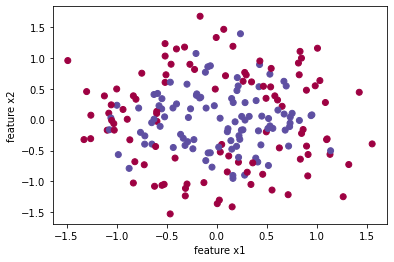

In [17]:
plt.scatter(X[0,:], X[1,:], c=Y, cmap=plt.cm.Spectral)
plt.title("")
plt.xlabel('feature x1')
plt.ylabel('feature x2')
plt.show()



## 2.3. Train Your Neural Network

Now train the Neural Network.  We will use 4 hidden units in the hidden layer.

Training for 1400 iterations using a learning rate of 1.5
Iteration 0 - Cost: 0.6931462715088976


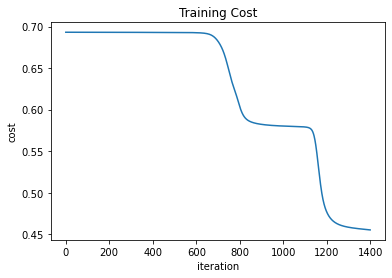

In [18]:
print('Training for {0} iterations using a learning rate of {1}'.format(n_iters, learning_rate))

# Train
W1, B1, W2, B2, costs = train_neural_network(X, Y, 4, n_iters, learning_rate)

# Plot cost
plt.plot(costs)
plt.title('Training Cost')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()


## 2.4 Visualizing the Decision boundary

We have written the function below named *plot_decision_boundary()* to help you plot the decision boundary. Unlike Logistic Regression, the boundary here is not defined by a straight line. So we use a different algorithm to plot the decision boundary than in Assignment 1. If you are curious, the algorithm performs the following steps 

1. Sample a grid of points over the 2D feature space
2. Make predictions using the model on the sampled points
3. Use these predictions to generate a countour plot with two levels (0, and 1)

In [19]:
def plot_decision_boundary(X, Y, W1, B1, W2, B2, subplot=plt):
    """ Plot decision boundary 
    
    Inputs:
        X:  NumPy array of training feature data of shape (n, m)
        Y:  NumPy array of training labels of shape (m,)
        W1: NumPy array of first layer of parameters with shape (n_h, n_x)
        B1: NumPy array of second layer bias parameters with shape (n_h, 1)
        W2: NumPy array of second layer of parameters with shape (1, n_h)
        B2: NumPy array of second layer bias parameters with shape (1, 1)
        subplot: Used when plotting subplots
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    
    # Generate a grid of points with distance h between them
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    Z = predict(np.c_[xx.ravel(), yy.ravel()].T, W1, B1, W2, B2)
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    subplot.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    subplot.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Spectral)

Call the function to plot the decision boundary. You should see a non-linear decision boundary (unlike in Logistic Regression) that does a decent job of partitioning the two classes!

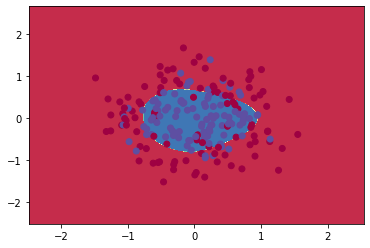

In [20]:
plot_decision_boundary(X, Y, W1, B1, W2, B2)


### 2.5 Measuring Accuracy

In Assignment 1, you already wrote a function to compute the accuracy of a model.  Instead of making you write it again, we have provided the function compute_accuracy() below.  Use it to check the accuracy of the Neural Network. 


In [21]:
def compute_accuracy(X, Y, W1, B1, W2, B2):
    """ Compute the accuracy of the model 
    
    Inputs:
        X:  NumPy array of feature data of shape (n, m)
        Y:  NumPy array of labels of shape (m,)
        W1: NumPy array of first layer of parameters with shape (n_h, n_x)
        B1: NumPy array of second layer bias parameters with shape (n_h, 1)
        W2: NumPy array of second layer of parameters with shape (1, n_h)
        B2: NumPy array of second layer bias parameters with shape (1, 1)

    Returns:
        NumPy array (m, ) of predictions.  Values are 0 or 1.
    """
    Y_predicted = predict(X, W1, B1, W2, B2)
    accuracy = np.mean(Y_predicted == Y)

    return accuracy

In [22]:
compute_accuracy(X, Y, W1, B1, W2, B2)

0.765

## 2.6 Try The Other Data Sets

Run through this section again using the different data sets.  The following table summarizes the accuracy achieved by Logistic Regression in Assignment1, versus this simple Neural Network. The takeaway is that this simple Neural Network is able to find a nonlinear decision boundary that greatly increases the accuracy of predictions!

| Data Set | Logistic Regression | Neural Network |
|----------|---------------------|----------------|
| Swirls   | 0.7                 | 0.99           |
| Circles  | 0.505               | 0.785          |
| Moons    | 0.865               | 0.96           |


## 3 Network Capacity and Number of Hidden Units

Now that we have working neural network framework, we can do some exploration on impact on the number of hidden units in the hidden layer.

Load the following data set which again contains input 2 features. The data is arranged in a ring of data points partitioned into alternating class segments.  


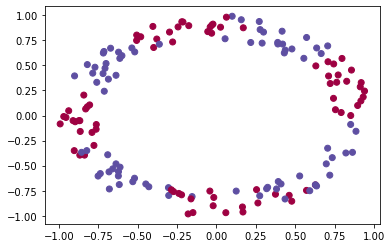

In [23]:
from a2_tools import load_partitioned_circles

X, Y = load_partitioned_circles()

plt.scatter(X[0,:], X[1,:], c=Y, cmap=plt.cm.Spectral)
plt.show()

Now run the following code.  It may take a few minutes. The code iterates through training our neural networking from using 1 to 9 hidden units in the hidden layer. It then plots the decision boundary and computes the accuracy. 

What are some observations you see as we increase the number of hidden units?

Training with 1 hidden units
Iteration 0 - Cost: 0.6931490462026669
Iteration 5000 - Cost: 0.6731810264011919
Iteration 10000 - Cost: 0.6695645455256285
Iteration 15000 - Cost: 0.6681978724011023
Training with 2 hidden units
Iteration 0 - Cost: 0.6931481741375306
Iteration 5000 - Cost: 0.5608967179001004
Iteration 10000 - Cost: 0.5557533529719272
Iteration 15000 - Cost: 0.5538649105924993
Training with 3 hidden units
Iteration 0 - Cost: 0.6931484977031126
Iteration 5000 - Cost: 0.37303888975228344
Iteration 10000 - Cost: 0.3680136898138171
Iteration 15000 - Cost: 0.3665823963328686
Training with 4 hidden units
Iteration 0 - Cost: 0.6931492749727991
Iteration 5000 - Cost: 0.30310650015778506
Iteration 10000 - Cost: 0.29565085922490003
Iteration 15000 - Cost: 0.2943571191025699
Training with 5 hidden units
Iteration 0 - Cost: 0.6931521796757387
Iteration 5000 - Cost: 0.3043019438928514
Iteration 10000 - Cost: 0.2848662548557589
Iteration 15000 - Cost: 0.2776022725669893
Training with 6 h

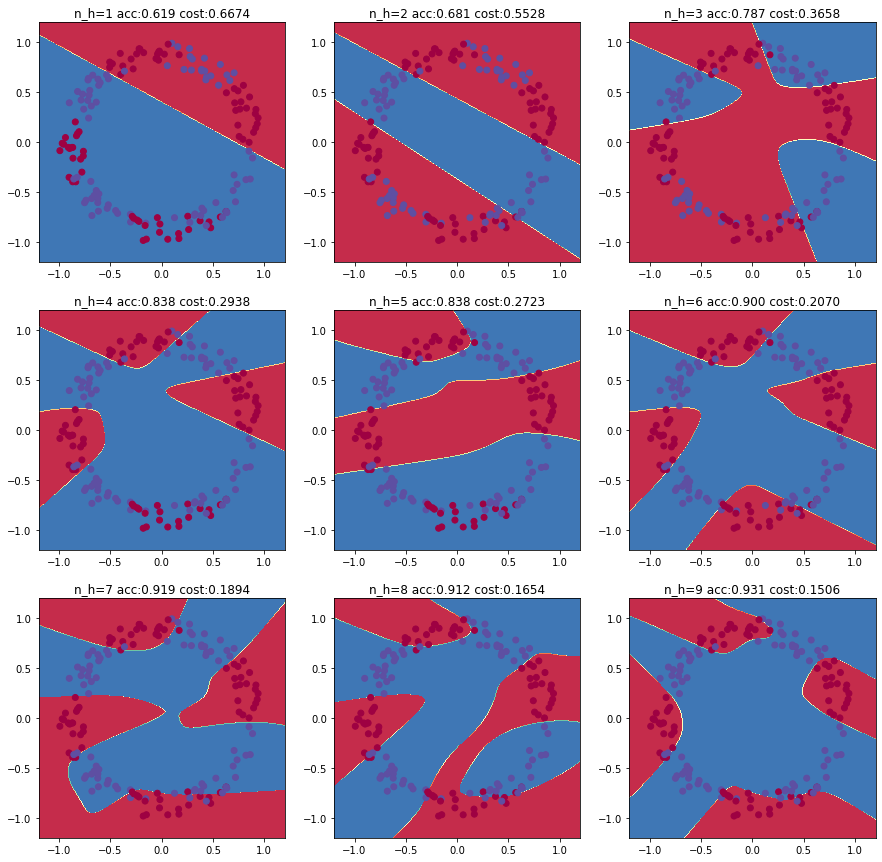

In [24]:
# Creating a matplotlib with a 3x3 grid of subplots
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

for i in range(9):
    # Train the neural network with a specific number of hidden units
    print("Training with {0} hidden units".format(i+1))
    W1, B1, W2, B2, costs = train_neural_network(X, Y, i+1, 20000, 1)
    
    # Compute the training accuracy
    train_accuracy = compute_accuracy(X, Y, W1, B1, W2, B2)
    
    # Plot the decision boundary 
    subplot = ax[int(i/3)][i%3]
    plot_decision_boundary(X, Y, W1, B1, W2, B2, subplot)
    
    subplot.set_xlim([-1.2, 1.2])
    subplot.set_ylim([-1.2, 1.2])
    subplot.title.set_text('n_h={0} acc:{1:0.3f} cost:{2:0.4f}'.format(
        i+1, train_accuracy, costs[-1]))
plt.show()



The goal of this exercise is to see that below some number of hidden units (5 in this case), the network doesn't have enough capacity to learn a decent decision boundary.  This is reflected numerically in the accuracy and final cost. It seems like we need at least 5-6 units.  But what happens as we add more?  Cost continues to decrease and accuracy does improve.  However, the decision boundary seems to contort more and have a less regular pattern.  Is this overfitting? Let's look at the overfitting problem a bit more in the next section.

## 4 Overfitting

Let's look at overfitting a little closer.  Run the following code which uses the noisy circles data set, and then trains our neural network using 4, 10, and 100 hidden units. The output of the code is 3 figures.  This code will take a few minutes.

Training with 4 hidden units
Iteration 0 - Cost: 0.6931466366805213
Iteration 5000 - Cost: 0.45371305752239643
Iteration 10000 - Cost: 0.44026432152503
Iteration 15000 - Cost: 0.4285281722792408
Iteration 20000 - Cost: 0.4194411859458102
Training with 10 hidden units
Iteration 0 - Cost: 0.6931470189301759
Iteration 5000 - Cost: 0.4690719281757245
Iteration 10000 - Cost: 0.4459676519246263
Iteration 15000 - Cost: 0.4155319423015345
Iteration 20000 - Cost: 0.3924118921093822
Training with 100 hidden units
Iteration 0 - Cost: 0.693142562539318
Iteration 5000 - Cost: 0.6928610340364739
Iteration 10000 - Cost: 0.4511543931956318
Iteration 15000 - Cost: 0.43902665996097584
Iteration 20000 - Cost: 0.41440757040550474


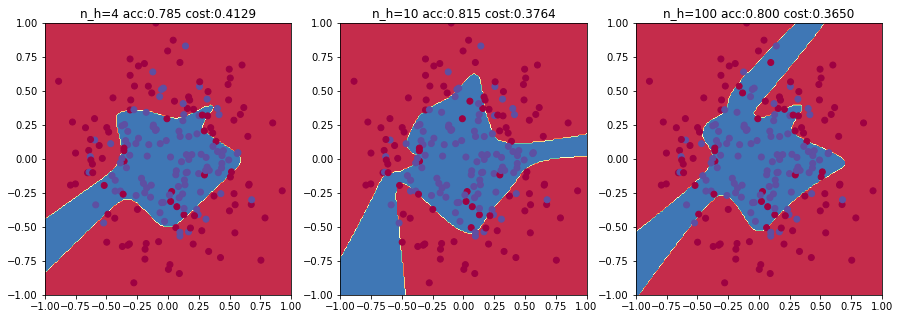

In [25]:
# Load noisy circles data set
X, Y, _, _ = load_data_and_hyperparams('noisy_circles')

# We rescale our input data to help speed up training. This is a technique
# called data preprocessing which we will discuss more of later
X= X* 1/np.max(X)

# Create a grid of subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for i, n_h in enumerate([4, 10, 100]):

    # Train the neural network with a specific number of hidden units
    print("Training with {0} hidden units".format(n_h))
    W1, B1, W2, B2, costs = train_neural_network(X, Y, n_h, 25000, 1)
    
    # Plot the decision boundary 
    subplot = ax[i%3]
    plot_decision_boundary(X, Y, W1, B1, W2, B2, subplot)

    subplot.set_xlim([-1, 1])
    subplot.set_ylim([-1, 1])
    subplot.title.set_text('n_h={0} acc:{1:0.3f} cost:{2:0.4f}'.format(
        n_h, compute_accuracy(X, Y, W1, B1, W2, B2), costs[-1]))
plt.show()



It appears that overfitting occuring when using 100 units.  With so many units, the network is able to model a very complex nonlinear decision boundary.  From these experiments, it seems like we have two competing goals when choosing  the number of hidden units:
1. We want enough capacity to fit the data well (want more hidden units)
2. We don't want too much capacity such that the data becomes overfit. (want fewer hidden units)

It would be nice to decouple the effects of capacity and overfitting.  As we will learn later in the course, there are a number of techniques that help us reduce overfitting without requiring us to reduce the capacity of our network. These techniques are generally referred to as Regularization Techniques.  They range from including different types of network layers in our network architecture (e.g. Dropout), modifiying the cost function, augmenting our training data, and more.

In fact, we can't even be sure the above is an overfitting problem because we need a way to assess how the model behaves on new data.  Maybe the irregular decision boundary is actaully good for our application! That's why we need to set aside a portion of our data for testing and not use it for training.  

Regularization will be the topic of a future assignment. And we will begin using training/test data split starting in the next assignment.

## 5. Conclusion

Congratulations on building your first neural network (in this course anyways)! 

In this assignment, you have:

- Built a complete Neural Network system that that can be used to train on data of any number of features!
- Implemented back propagation - a key aspect of training neural networks
- Explored the abilities of a neural network on non-linearly-separable data
- Explored how varying the number of hidden units impact accuracy and overfitting


Thank you to Singulos Research for feedback, suggestions, and testing of this assignment.